In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [43]:
df = pd.read_csv('Bitstamp_BTCEUR_d.csv')
#df = df.iloc[::-1]
df = df.drop('unix', axis=1)
df.head()

,date,symbol,open,high,low,close,Volume BTC,Volume EUR
0,2023-02-27 00:00:00,BTC/EUR,22320.0,22330.0,22309.0,22310.0,0.247371,5.518839e+03
1,2023-02-26 00:00:00,BTC/EUR,21993.0,22460.0,21894.0,22328.0,172.790042,3.858056e+06
2,2023-02-25 00:00:00,BTC/EUR,21991.0,22008.0,21605.0,21999.0,134.350303,2.955572e+06
3,2023-02-24 00:00:00,BTC/EUR,22585.0,22743.0,21680.0,21991.0,406.141237,8.931452e+06
4,2023-02-23 00:00:00,BTC/EUR,22800.0,23141.0,22277.0,22583.0,375.317591,8.475797e+06


In [37]:
df.shape

(2460, 8)

In [38]:
df.describe()

,open,high,low,close,Volume BTC,Volume EUR
count,2460.000000,2460.000000,2460.000000,2460.000000,2.460000e+03,2.460000e+03
mean,14267.156207,14651.730382,13832.040829,14277.429280,2.562895e+06,2.124907e+07
std,14289.109816,14663.040130,13859.592009,14289.684093,1.078815e+07,3.685615e+07
min,479.910000,507.330000,424.000000,459.870000,2.473706e-01,4.943000e+01
25%,3817.615000,3927.112500,3676.947500,3827.765000,9.057256e+02,6.075377e+03
50%,8161.000000,8297.105000,7979.775000,8169.905000,1.785605e+03,9.345857e+06
75%,20881.250000,21430.250000,20504.750000,20930.250000,1.039214e+05,2.338533e+07
max,58220.400000,59666.000000,57187.210000,58247.900000,1.839401e+08,5.038706e+08


In [39]:
df_row_reversed = df.loc[::-1, :]

In [40]:
df_row_reversed.head()

,date,symbol,open,high,low,close,Volume BTC,Volume EUR
2459,2016-06-04 00:00:00,BTC/EUR,503.01,507.33,490.00,503.00,83059.64,166.86
2458,2016-06-05 00:00:00,BTC/EUR,502.46,510.13,496.93,505.98,108418.34,214.99
2457,2016-06-06 00:00:00,BTC/EUR,505.97,515.00,501.85,514.23,204665.56,399.86
2456,2016-06-07 00:00:00,BTC/EUR,514.59,520.00,492.02,507.94,329572.15,645.30
2455,2016-06-08 00:00:00,BTC/EUR,507.99,515.00,502.64,513.00,285741.16,561.08


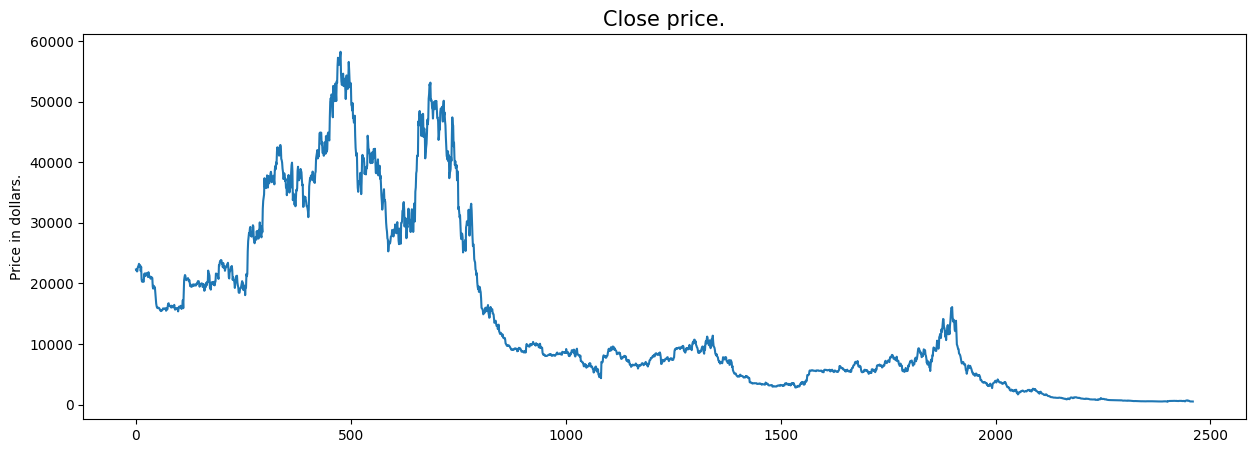

In [44]:
plt.figure(figsize=(15,5))
plt.plot(df['close'])
plt.title('Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

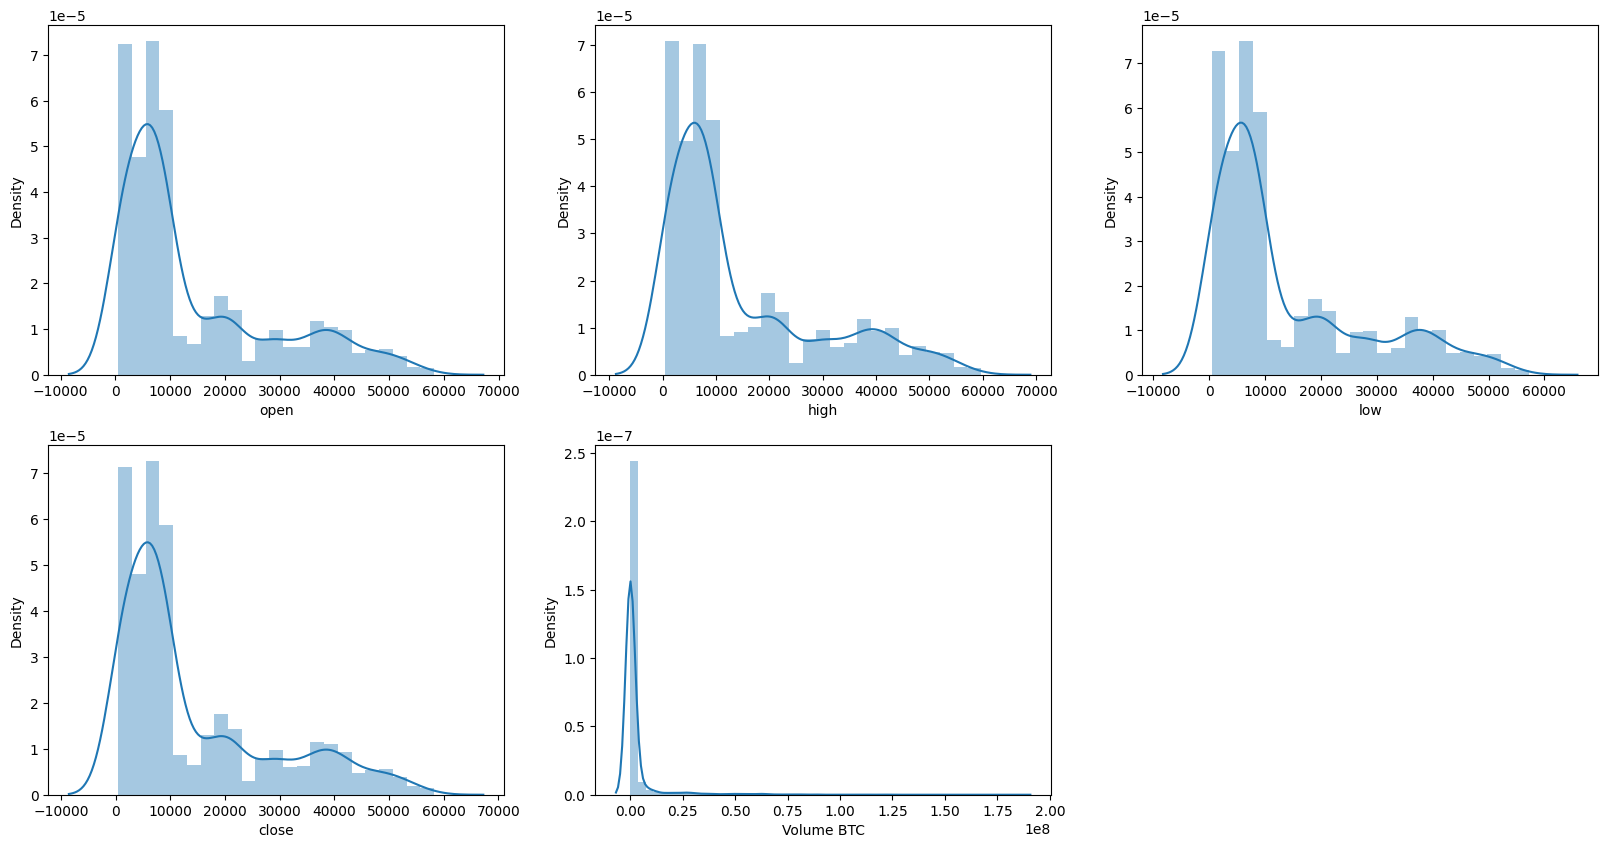

In [45]:
features = ['open', 'high', 'low', 'close', 'Volume BTC']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

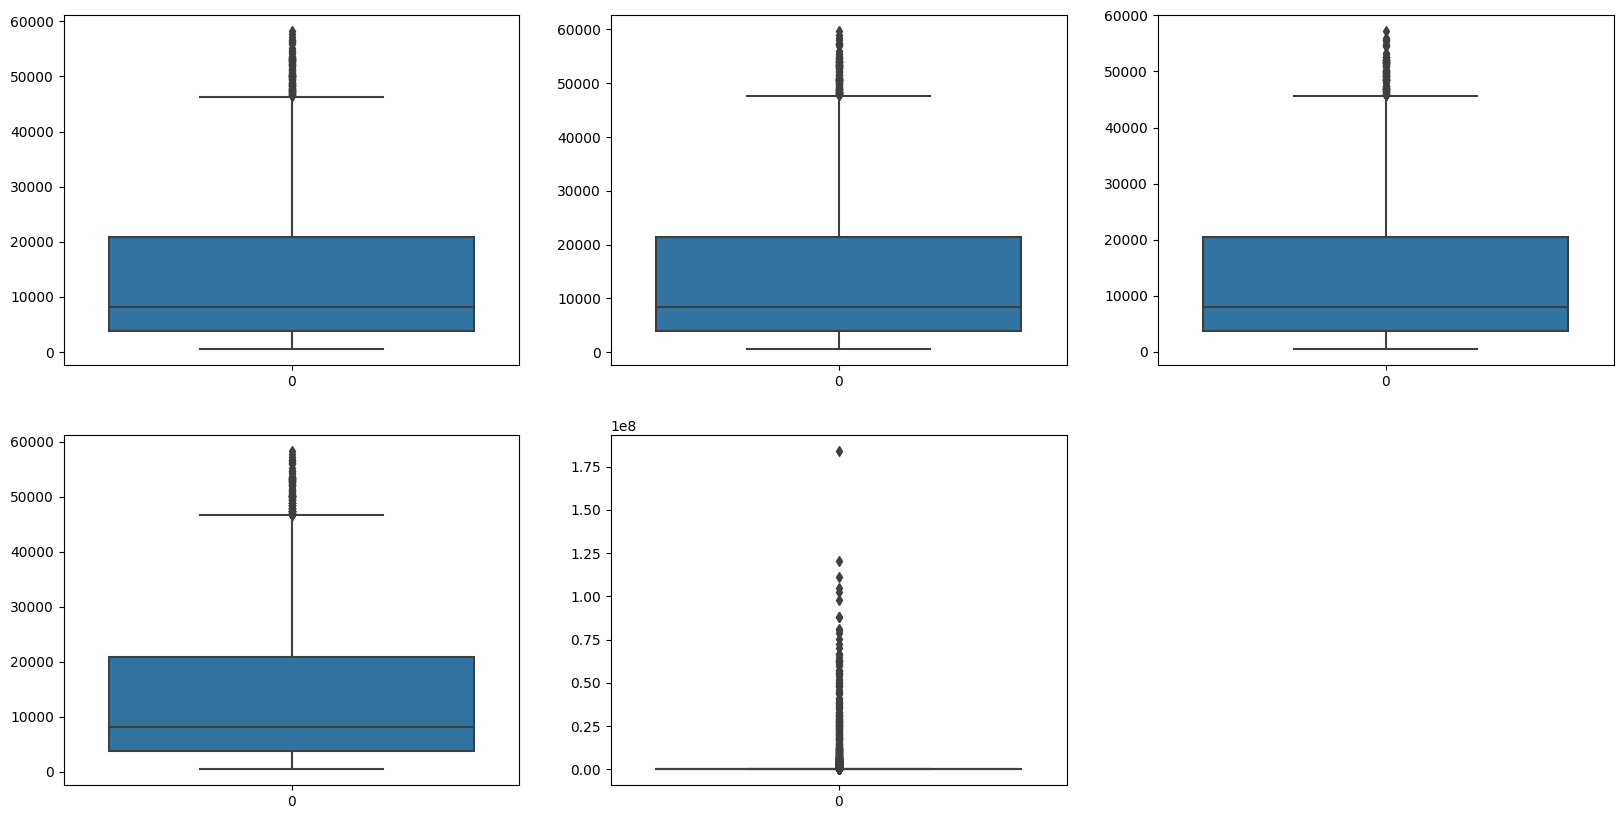

In [46]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

In [64]:
df['date'] = df['date'].str.replace('00:00:00', '')

In [65]:
splitted = df['date'].str.split('-', expand=True)
 
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')
df['day'] = splitted[2].astype('int')
 
df.head()

,date,symbol,open,high,low,close,Volume BTC,Volume EUR,month,year,day
0,2023-02-27,BTC/EUR,22320.0,22330.0,22309.0,22310.0,0.247371,5.518839e+03,2,2023,27
1,2023-02-26,BTC/EUR,21993.0,22460.0,21894.0,22328.0,172.790042,3.858056e+06,2,2023,26
2,2023-02-25,BTC/EUR,21991.0,22008.0,21605.0,21999.0,134.350303,2.955572e+06,2,2023,25
3,2023-02-24,BTC/EUR,22585.0,22743.0,21680.0,21991.0,406.141237,8.931452e+06,2,2023,24
4,2023-02-23,BTC/EUR,22800.0,23141.0,22277.0,22583.0,375.317591,8.475797e+06,2,2023,23


In [67]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,date,symbol,open,high,low,close,Volume BTC,Volume EUR,month,year,day,is_quarter_end
0,2023-02-27,BTC/EUR,22320.0,22330.0,22309.0,22310.0,0.247371,5.518839e+03,2,2023,27,0
1,2023-02-26,BTC/EUR,21993.0,22460.0,21894.0,22328.0,172.790042,3.858056e+06,2,2023,26,0
2,2023-02-25,BTC/EUR,21991.0,22008.0,21605.0,21999.0,134.350303,2.955572e+06,2,2023,25,0
3,2023-02-24,BTC/EUR,22585.0,22743.0,21680.0,21991.0,406.141237,8.931452e+06,2,2023,24,0
4,2023-02-23,BTC/EUR,22800.0,23141.0,22277.0,22583.0,375.317591,8.475797e+06,2,2023,23,0


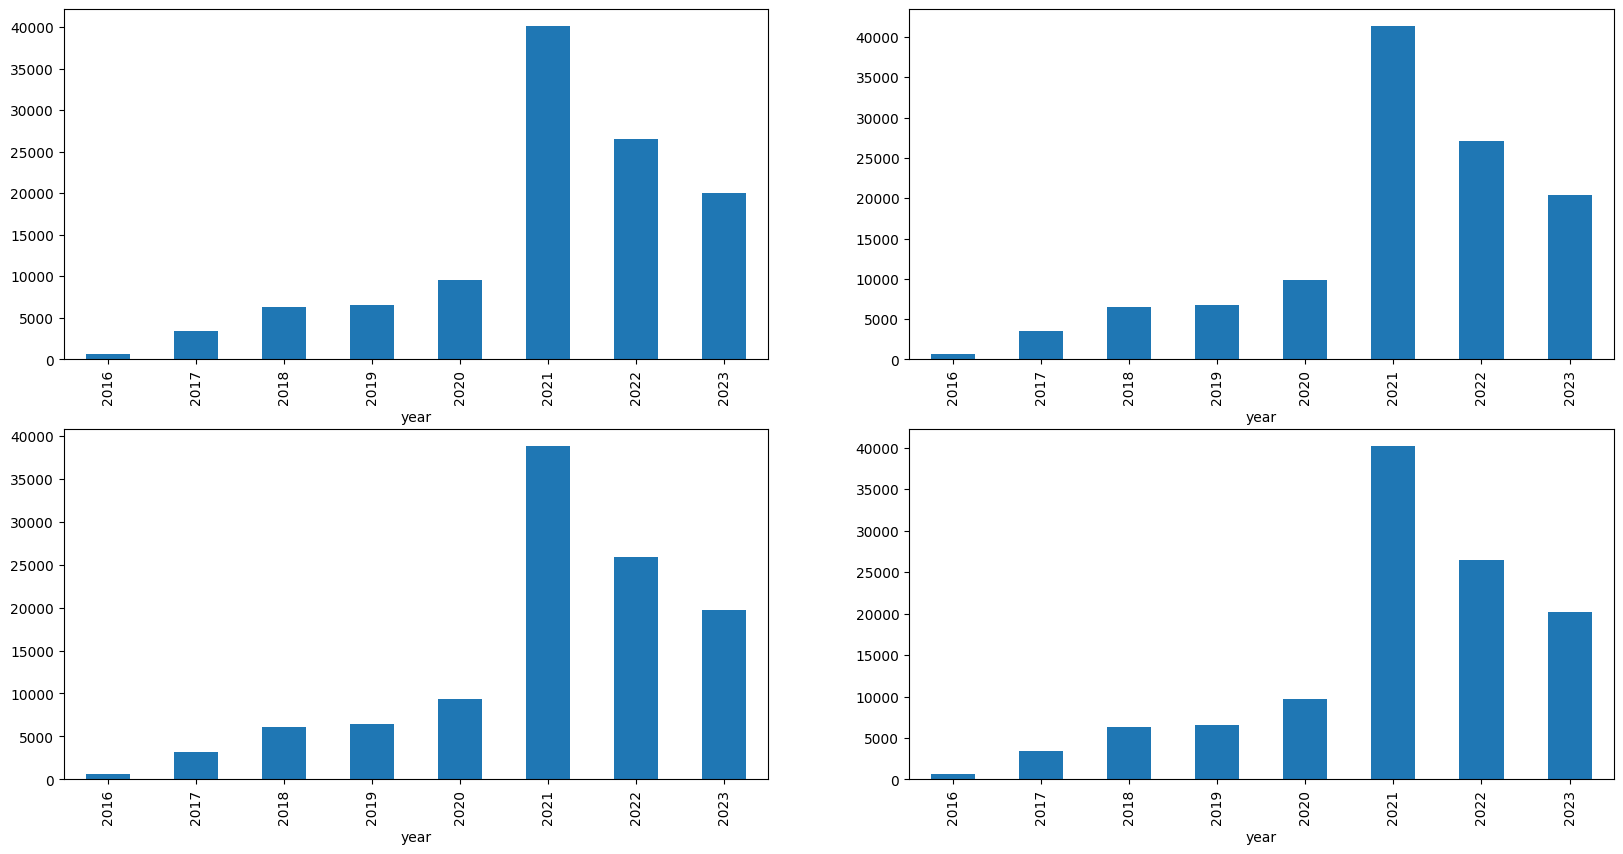

In [69]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(['open', 'high', 'low', 'close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [70]:
df.groupby('is_quarter_end').mean()

,open,high,low,close,Volume BTC,Volume EUR,month,year,day
is_quarter_end,,,,,,,,,
0,14545.078976,14939.411665,14112.502317,14563.324470,2.391200e+06,2.199734e+07,6.093902,2019.361585,15.702439
1,13711.310671,14076.367817,13271.117854,13705.638902,2.906286e+06,1.975251e+07,7.675610,2019.124390,15.795122


In [72]:
df['open-close'] = df['open'] - df['close']
df['low-high'] = df['low'] - df['high']
df['target'] = np.where(df['close'].shift(-1) > df['close'], 1, 0)

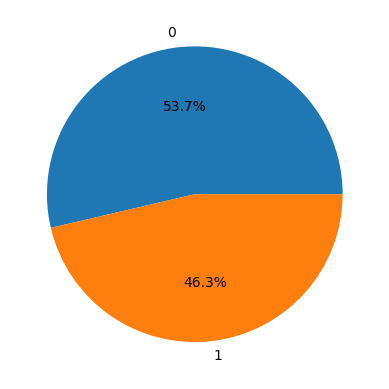

In [73]:
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

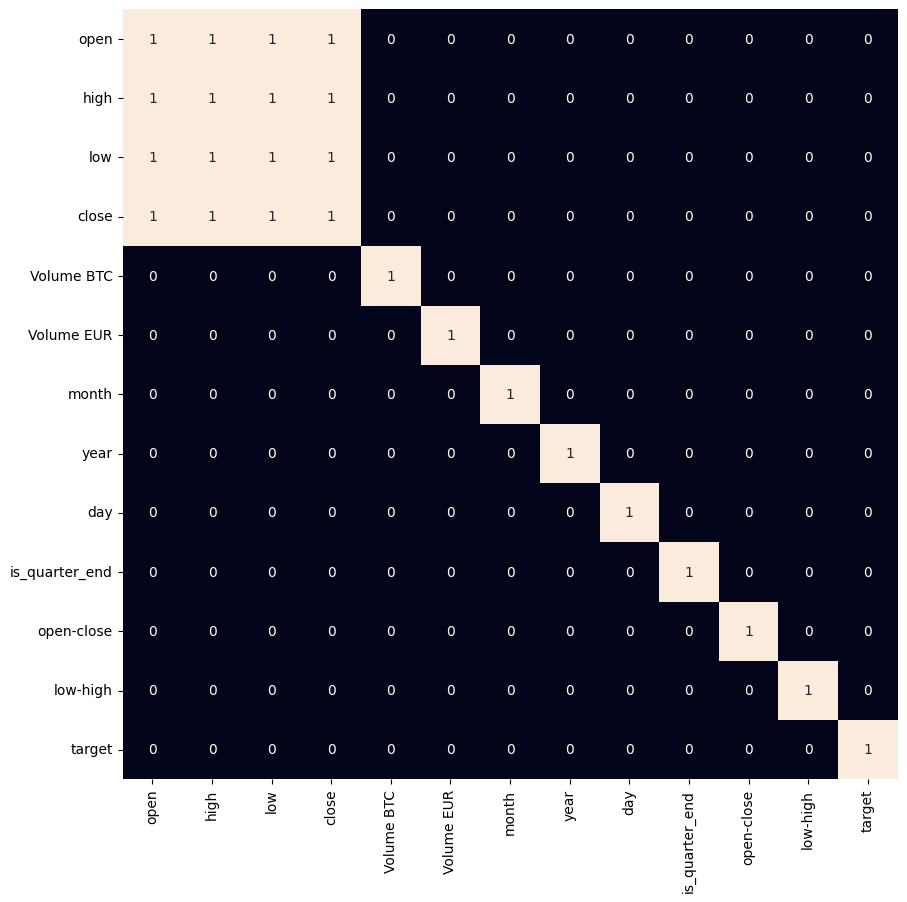

In [74]:
plt.figure(figsize=(10, 10))
 
# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show

In [90]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)



(2214, 3) (246, 3)
[[-0.07740259  0.49207309 -0.70710678]
 [-1.40262461 -1.12375975  1.41421356]
 [-0.63661631  0.29359121 -0.70710678]
 ...
 [-0.39458247  0.11405935  1.41421356]
 [-0.02282829  0.57359046 -0.70710678]
 [ 0.07303578  0.50725155  1.41421356]]


In [77]:
models = [LogisticRegression(), SVC(
kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(
	    Y_train, models[i].predict_proba(X_train)[:,1]))
    print('Validation Accuracy : ', metrics.roc_auc_score(
	    Y_valid, models[i].predict_proba(X_valid)[:,1]))
    print()

LogisticRegression() : 
Training Accuracy :  0.9973991279525604
Validation Accuracy :  0.9935155164427976

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.9889627134451456
Validation Accuracy :  0.9877588830807913

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accura

In [88]:
model.predict

TypeError: __init__() takes 2 positional arguments but 4 were given